In [ ]:
#import libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
gesture_recog_train=pd.read_csv('/content/sign_mnist_train.csv')
gesture_recog_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
gesture_recog_test=pd.read_csv('/content/sign_mnist_test.csv')
gesture_recog_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
gesture_recog_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
gesture_recog_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
gesture_recog_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
gesture_recog_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
gesture_recog_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
gesture_recog_test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

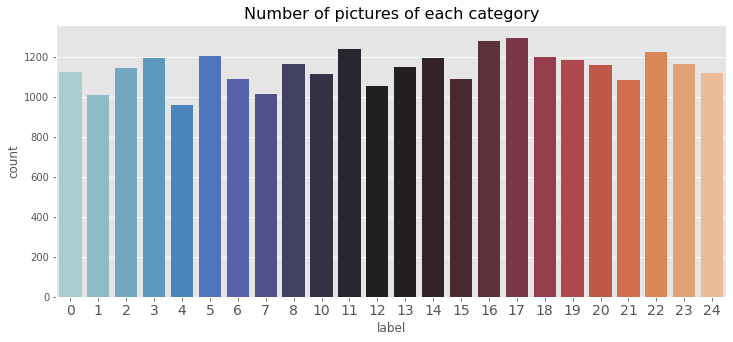

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize =(12,5))
sns.countplot(x=gesture_recog_train['label'],data =gesture_recog_train,palette="icefire")
plt.title("Number of pictures of each category", fontsize = 16)
plt.xticks(fontsize = 14)
plt.show()

In [ ]:
#Reshaping
# In this section we will add another dimension to the data

picture_Y_train=gesture_recog_train['label'].values
picture_Y_test=gesture_recog_test['label'].values

picture_X_train=gesture_recog_train.drop(["label"],axis=1).values
picture_X_test=gesture_recog_test.drop(["label"],axis=1).values

print("X train values",picture_X_train.shape)
print("X test values",picture_X_test.shape)

mnist_training_pictures = picture_X_train.reshape(-1,28,28,1)
mnist_testing_pictures = picture_X_test.reshape(-1,28,28,1)

print("training pictures after resizing", mnist_training_pictures.shape)
print("testing pictures after resizing",mnist_testing_pictures.shape)
print("Y train labels",picture_Y_train.shape)
print("Y test  labels",picture_Y_test.shape)

X train values (27455, 784)
X test values (7172, 784)
training pictures after resizing (27455, 28, 28, 1)
testing pictures after resizing (7172, 28, 28, 1)
Y train labels (27455,)
Y test  labels (7172,)


In [ ]:
#Normalizing
mnist_training_pictures = mnist_training_pictures/255.0
mnist_testing_pictures =mnist_testing_pictures/255.0
print(mnist_training_pictures.shape)
print(mnist_testing_pictures.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


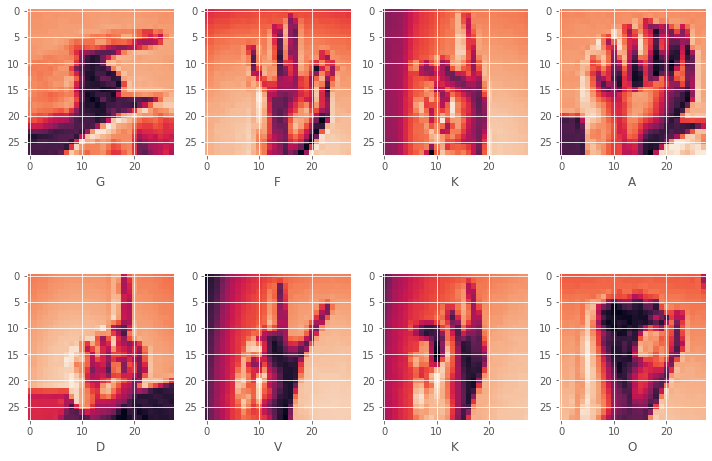

In [ ]:
figure, axis = plt.subplots(2,4)
figure.set_size_inches(10,10)
n1= 0
for i in range(2):
    for j in range(4):
        axis[i,j].set_xlabel(chr(picture_Y_test[n1] + 65))
        axis[i,j].imshow(mnist_testing_pictures[n1].reshape(28,28)
                       ,cmap='rocket')
        n1+= 1
    plt.tight_layout()

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelBinarizer
binar1=LabelBinarizer()
picture_Y_train=binar1.fit_transform(picture_Y_train)
picture_Y_test=binar1.fit_transform(picture_Y_test)
print(picture_Y_train)
print('initial picture label after encoding: ',picture_Y_train[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
initial picture label after encoding:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Using unique to find out different numeric intrepretation of symbols
label_uni= gesture_recog_train.label.values
label_value = np.array(label_uni)
np.unique(label_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

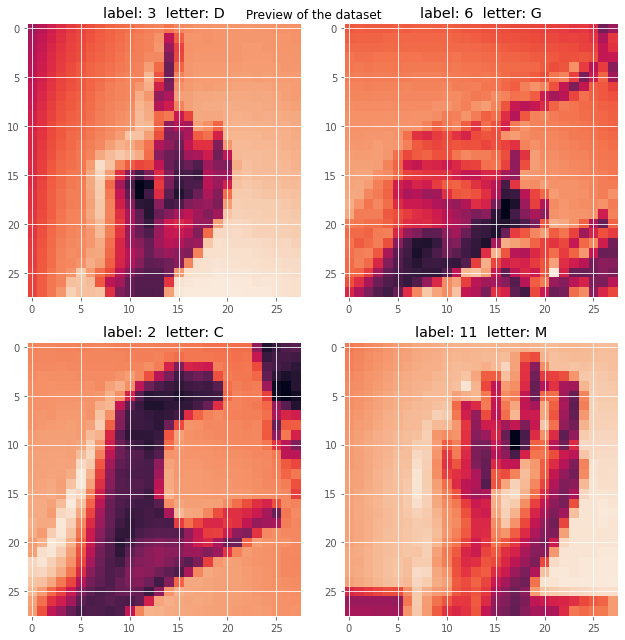

In [ ]:
#Data Visualization
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of the dataset')
fig.set_size_inches(9,9)


axe[0,0].imshow(mnist_training_pictures[0].reshape(28,28),cmap='rocket')
axe[0,0].set_title('label: 3  letter: D')


axe[0,1].imshow(mnist_training_pictures[1].reshape(28,28),cmap='rocket')
axe[0,1].set_title('label: 6  letter: G')

axe[1,0].imshow(mnist_training_pictures[2].reshape(28,28),cmap='rocket')
axe[1,0].set_title('label: 2  letter: C')


axe[1,1].imshow(mnist_training_pictures[4].reshape(28,28),cmap='rocket')
axe[1,1].set_title('label: 11  letter: M')


plt.tight_layout()


In [ ]:
#Data Augmentation
#Now create Image generator object for train images 
picture_generation= ImageDataGenerator(rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')


In [ ]:
#for validation data 
validation_picturegenerator = ImageDataGenerator()

In [ ]:
print(mnist_training_pictures.shape)
print(mnist_testing_pictures.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
#Convolutional NeuralNetwork
model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))

model.add(MaxPool2D(pool_size=(3,3),strides=1,padding='same'))

model.add(Conv2D(filters=64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),strides=2,padding='same'))

model.add(Conv2D(filters=32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),strides=2,padding='same'))
          
model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=24,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

In [ ]:
# Train the Model
history = model.fit(picture_generation.flow(mnist_training_pictures,picture_Y_train, batch_size=200),
                              epochs=10,
                              validation_data=(mnist_testing_pictures,picture_Y_test),
                               shuffle=1)


Epoch 1/10
138/138 [==============================] - 257s 2s/step - loss: 2.9555 - accuracy: 0.1179 - val_loss: 1.9552 - val_accuracy: 0.4037
Epoch 2/10
138/138 [==============================] - 262s 2s/step - loss: 2.0371 - accuracy: 0.3580 - val_loss: 1.1508 - val_accuracy: 0.6327
Epoch 3/10
138/138 [==============================] - 263s 2s/step - loss: 1.4309 - accuracy: 0.5338 - val_loss: 0.8965 - val_accuracy: 0.6834
Epoch 4/10
138/138 [==============================] - 262s 2s/step - loss: 1.0917 - accuracy: 0.6376 - val_loss: 0.8377 - val_accuracy: 0.6955
Epoch 5/10
138/138 [==============================] - 275s 2s/step - loss: 0.8766 - accuracy: 0.7038 - val_loss: 0.4903 - val_accuracy: 0.8338
Epoch 6/10
138/138 [==============================] - 266s 2s/step - loss: 0.7301 - accuracy: 0.7529 - val_loss: 0.6005 - val_accuracy: 0.7939
Epoch 7/10
138/138 [==============================] - 264s 2s/step - loss: 0.6132 - accuracy: 0.7960 - val_loss: 0.2576 - val_accuracy: 0.9198

In [ ]:
(ls,acc)=model.evaluate(mnist_testing_pictures, picture_Y_test)

225/225 [==============================] - 13s 58ms/step - loss: 0.1858 - accuracy: 0.9490


In [ ]:
print('Convolutional Neural Network MODEL ACCURACY = {}%'.format(acc*100))

Convolutional Neural Network MODEL ACCURACY = 94.8968231678009%


In [ ]:
y_pred = model.predict(mnist_testing_pictures)

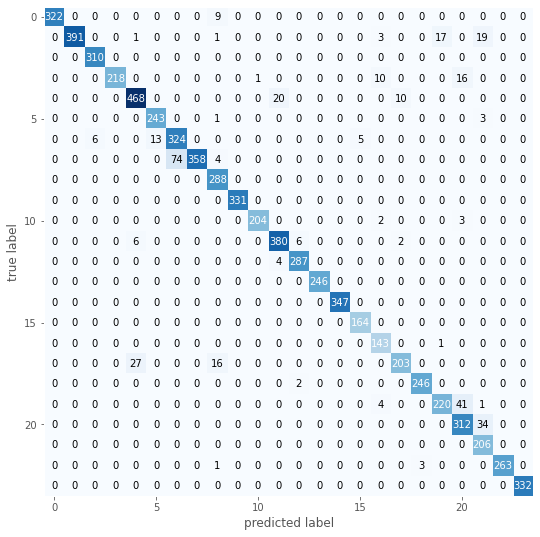

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
conf_mat = confusion_matrix(picture_Y_test.argmax(axis=1), y_pred.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=False,
                                show_absolute=True,
                                figsize=(9, 9))
fig.show()

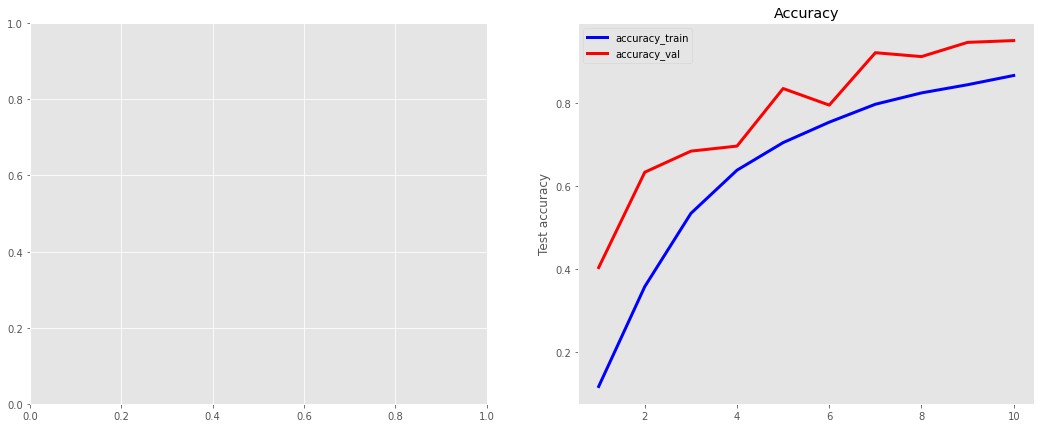

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
plt.subplot(1, 2, 1)
axs = axs.ravel()
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
axs[0].plot(epochs, loss, 'b', label='loss_train',linewidth=3)
axs[0].plot(epochs, loss_val, 'r', label='loss_val',linewidth=3)
axs[0].set_title('Test accuracy loss')

axs[0].set_ylabel('Test accuracy loss ')
axs[0].legend()
axs[0].grid()
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
axs[1].plot(epochs, acc, 'b', label='accuracy_train',linewidth=3)
axs[1].plot(epochs, acc_val, 'r', label='accuracy_val',linewidth=3)
axs[1].set_title('Accuracy')

axs[1].set_ylabel('Test accuracy')
axs[1].legend()
axs[1].grid()
plt.show()

In [ ]:
#Preparing The Data
picture_Y_train = gesture_recog_train['label'].values
picture_X_train = gesture_recog_train.drop(columns = 'label')

#Normalization
picture_X_train= picture_X_train/255.0

#scaling the features
from sklearn.preprocessing import scale
picture_X_train= scale(picture_X_train)

picture_Y_test=gesture_recog_test['label']

picture_X_test=gesture_recog_test.drop(columns = 'label')

picture_X_test= picture_X_test/255.0

picture_X_test= scale(picture_X_test)

In [ ]:
#Reshaping
# In this section we will add another dimension to the data

picture_Y_train=gesture_recog_train['label'].values
picture_Y_test=gesture_recog_test['label'].values

picture_X_train=gesture_recog_train.drop(["label"],axis=1).values
picture_X_test=gesture_recog_test.drop(["label"],axis=1).values

print("X train values",picture_X_train.shape)
print("X test values",picture_X_test.shape)

mnist_training_pictures = picture_X_train.reshape(-1,28,28,1)
mnist_testing_pictures = picture_X_test.reshape(-1,28,28,1)

print("training pictures after resizing", mnist_training_pictures.shape)
print("testing pictures after resizing",mnist_testing_pictures.shape)
print("Y train labels",picture_Y_train.shape)
print("Y test  labels",picture_Y_test.shape)

X train values (27455, 784)
X test values (7172, 784)
training pictures after resizing (27455, 28, 28, 1)
testing pictures after resizing (7172, 28, 28, 1)
Y train labels (27455,)
Y test  labels (7172,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(picture_X_test,picture_Y_test, test_size = 0.2, random_state=0)

Artificial Neural Network

In [ ]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
def build_classifier():
    classifier = Sequential() 
    classifier.add(Dense(units = 8,  activation = 'relu', input_dim= x_train.shape[1]))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1,  activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)


Epoch 1/10
120/120 [==============================] - 1s 2ms/step - loss: -66996.8359 - accuracy: 0.0635
Epoch 2/10
120/120 [==============================] - 0s 3ms/step - loss: -422834.9062 - accuracy: 0.0635
Epoch 3/10
120/120 [==============================] - 0s 2ms/step - loss: -1331189.0000 - accuracy: 0.0635
Epoch 4/10
120/120 [==============================] - 0s 2ms/step - loss: -3069578.0000 - accuracy: 0.0635
Epoch 5/10
120/120 [==============================] - 0s 2ms/step - loss: -5898160.5000 - accuracy: 0.0635
Epoch 6/10
120/120 [==============================] - 0s 2ms/step - loss: -10040068.0000 - accuracy: 0.0635
Epoch 7/10
120/120 [==============================] - 0s 2ms/step - loss: -15694604.0000 - accuracy: 0.0635
Epoch 8/10
120/120 [==============================] - 0s 2ms/step - loss: -23050632.0000 - accuracy: 0.0635
Epoch 9/10
120/120 [==============================] - 0s 2ms/step - loss: -32272028.0000 - accuracy: 0.0635
Epoch 10/10
60/60 [=================

In [ ]:
print("Evaluation on test data : ")
mean = accuracies.mean()*1000
print("Test Accuracy mean: " + str(mean))

Evaluation on test data : 
Test Accuracy mean: 62.228103478749595


Autoencoder

In [ ]:
#Autoencoder
import tensorflow as tf
input_img = tf.keras.layers.Input(shape=(784,), name = "input")

# this is the encoded representation of the input
encoded = Dense(1024, activation='relu', name="emb_0")(input_img)
encoded = Dense(512, activation='relu', name="emb_1")(encoded)
encoded = Dense(256, activation='relu', name="emb_2")(encoded)
encoded = Dense(128, activation='relu', name="emb_3")(encoded)
encoded = Dense(64, activation='relu', name="emb_4")(encoded)
encoded = Dense(16, activation='relu', name="emb_5")(encoded)
latent_vector = Dense(2, activation='relu', name="latent_vector")(encoded)

In [ ]:
# this is the loss reconstruction of the input
decoded = Dense(16, activation='relu', name="dec_1")(latent_vector)
decoded = Dense(64, activation='relu', name="dec_3")(decoded)
decoded = Dense(128, activation='relu', name="dec_4")(decoded)
decoded = Dense(256, activation='relu', name="dec_5")(decoded)
decoded = Dense(512, activation='relu', name="dec_6")(decoded)
decoded = Dense(1024, activation='relu', name="dec_7")(decoded)

output_layer = Dense(784, activation = 'sigmoid', name="output")(decoded)

In [ ]:
autoencoder = tf.keras.models.Model(input_img, output_layer)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 emb_0 (Dense)               (None, 1024)              803840    
                                                                 
 emb_1 (Dense)               (None, 512)               524800    
                                                                 
 emb_2 (Dense)               (None, 256)               131328    
                                                                 
 emb_3 (Dense)               (None, 128)               32896     
                                                                 
 emb_4 (Dense)               (None, 64)                8256      
                                                                 
 emb_5 (Dense)               (None, 16)                1040  

In [ ]:
encoder = tf.keras.models.Model(input_img, latent_vector)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 emb_0 (Dense)               (None, 1024)              803840    
                                                                 
 emb_1 (Dense)               (None, 512)               524800    
                                                                 
 emb_2 (Dense)               (None, 256)               131328    
                                                                 
 emb_3 (Dense)               (None, 128)               32896     
                                                                 
 emb_4 (Dense)               (None, 64)                8256      
                                                                 
 emb_5 (Dense)               (None, 16)                1040

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
auto_history = autoencoder.fit(picture_X_train, picture_X_train, epochs=10, batch_size=200,validation_data=(picture_X_test, picture_X_test))


Epoch 1/10
138/138 [==============================] - 15s 101ms/step - loss: 27436.8789 - val_loss: 27868.1230
Epoch 2/10
138/138 [==============================] - 14s 99ms/step - loss: 27434.5078 - val_loss: 27868.1230
Epoch 3/10
138/138 [==============================] - 13s 93ms/step - loss: 27434.5059 - val_loss: 27868.1230
Epoch 4/10
138/138 [==============================] - 13s 92ms/step - loss: 27434.5098 - val_loss: 27868.1230
Epoch 5/10
138/138 [==============================] - 14s 101ms/step - loss: 27434.5098 - val_loss: 27868.1230
Epoch 6/10
138/138 [==============================] - 13s 92ms/step - loss: 27434.5117 - val_loss: 27868.1230
Epoch 7/10
138/138 [==============================] - 13s 93ms/step - loss: 27434.5059 - val_loss: 27868.1230
Epoch 8/10
138/138 [==============================] - 13s 94ms/step - loss: 27434.5098 - val_loss: 27868.1230
Epoch 9/10
138/138 [==============================] - 13s 98ms/step - loss: 27434.5078 - val_loss: 27868.1230
Epoch 10

In [ ]:
decoded_images = autoencoder.predict(picture_X_test)

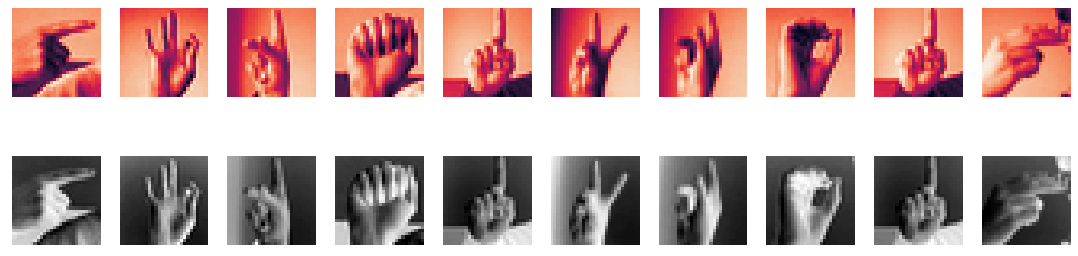

In [ ]:
numberof_pictures = 10 
plt.figure(figsize=(19, 5))
for i in range(numberof_pictures):
    ax = plt.subplot(2, numberof_pictures, i + 1)
    plt.imshow(picture_X_test[i].reshape(28, 28),cmap='rocket')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, numberof_pictures, i + 1 + numberof_pictures)
    plt.imshow(picture_X_test[i].reshape(28, 28),cmap='binary')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()